# 0) Module Import and Read Dataset

https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [144]:
# R-sqared 값이 1에 가까울 수록
# RMSE가 작을수록 좋은 모형
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)':[],
                          'R-squared (training)':[],
                          'Adjusted R-squared (training)':[],
                          'R-squared (test)':[],
                          'Adjusted R-squared (test)':[],
                          '5-Fold Cross Validation':[]})

In [8]:
df = pd.read_csv('../data/housesalesprediction/input/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# 1) EDA

In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

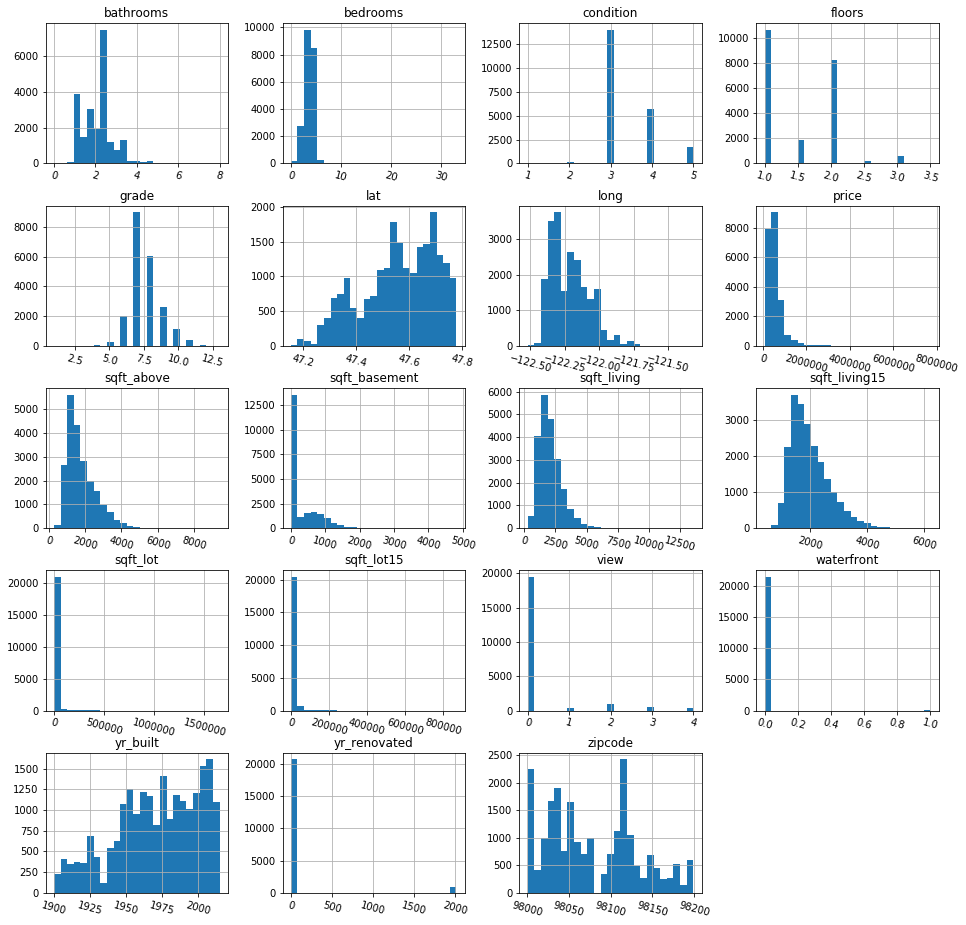

In [17]:
df1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

h = df1.hist(bins=25, figsize=(16,16),
            xlabelsize='10', ylabelsize='10', xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [156]:
#%%capture
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

## 1) outlier

In [20]:
sns.set(style='whitegrid', font_scale=1)

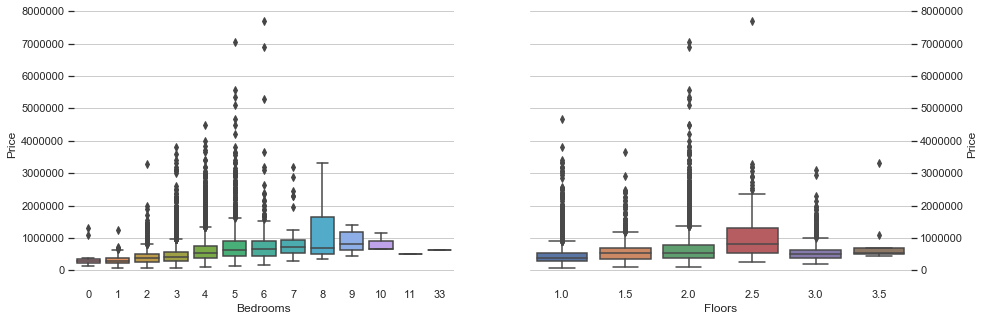

In [29]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x=df['bedrooms'], y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'], y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)

axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()

axes[1].set(xlabel='Floors', ylabel='Price')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Bathrooms / Bedrooms')]

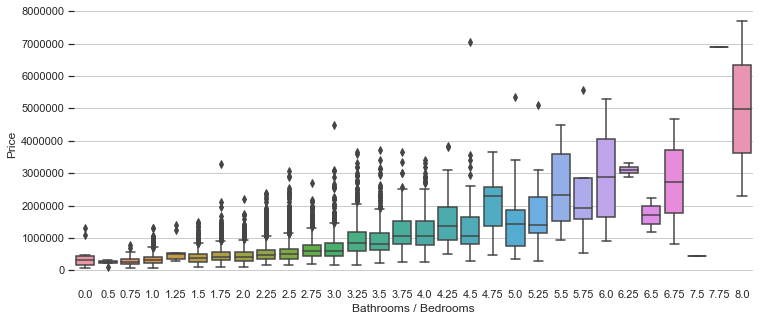

In [34]:
f, axe = plt.subplots(1,1, figsize=(12.18, 5))
sns.despine(left=True, bottom= True) # 왼쪽 아래쪽 실선 축 제거
sns.boxplot(x=df['bathrooms'], y=df['price'], ax=axe)
axe.yaxis.tick_left() # y축 왼쪽으로
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price')

### 3가지 변수간의 관계 보기

[(0, 12)]

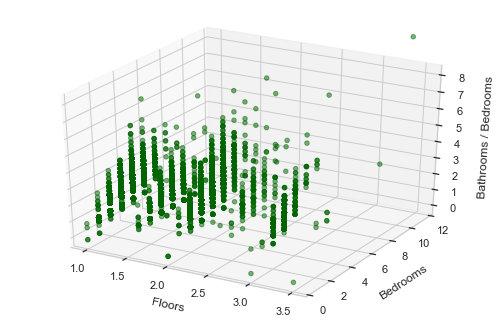

In [37]:
fig = plt.figure(figsize=(19,12.5))
ax = fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'], df['bedrooms'], df['bathrooms'],
          c='darkgreen', alpha=.5)
ax.set(xlabel='\nFloors',
      ylabel='\nBedrooms',
      zlabel='\n Bathrooms / Bedrooms')
ax.set(ylim=[0,12])

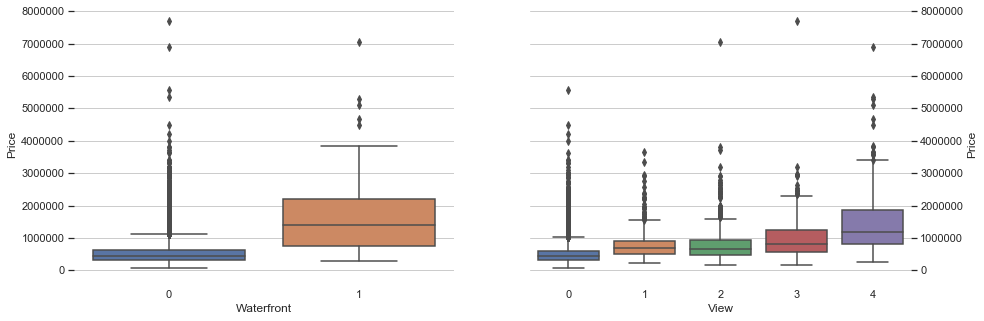

In [42]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x=df['waterfront'], y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'], y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()

axes[1].set(xlabel='View', ylabel='Price')
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position('right')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Grade')]

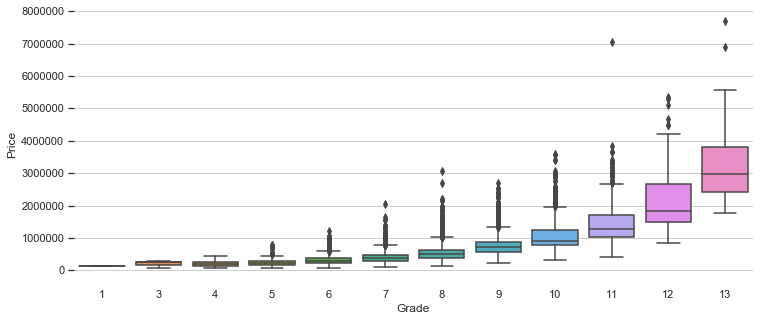

In [45]:
f, axe = plt.subplots(1,1, figsize=(12.18, 5))
sns.boxplot(x=df['grade'], y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price')

# 2) Check correlation

In [47]:
# 1) 모델 성능 향상에 영향을 주지 않는 변수 제거
# 2) 연관성이 높은 변수 제거

In [48]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [61]:
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

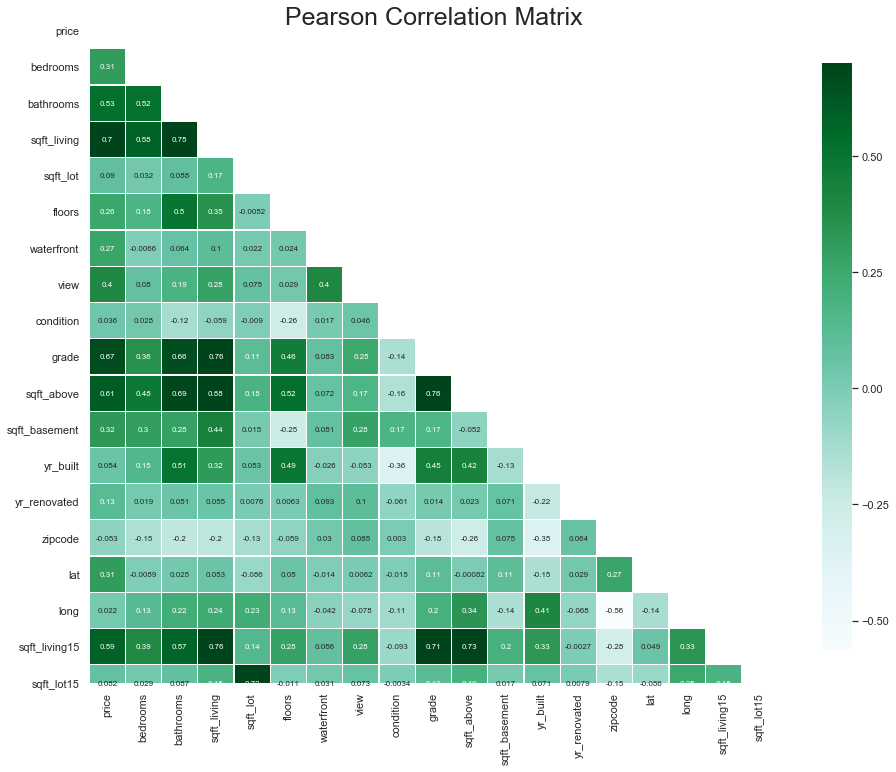

In [62]:
f, ax = plt.subplots(figsize= (16,12))
plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(df[features].corr(), 
            linewidths=0.25, vmax=0.7, square= True,
           cmap='BuGn', linecolor='w', annot=True, annot_kws={'size':8},
           mask = mask, cbar_kws={'shrink':.9})

# cbark_kws : 오른쪽 축 크기
# mask : 대칭이니까 지우기

## 3) Data Preprocessing

In [65]:
df_dm = df.copy()
df_dm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 3.1) Binning

In [67]:
# yr_built, yr_renovated -> age of house

In [74]:
df_dm[['date', 'yr_renovated']].head()

,date,yr_renovated
0,20141013T000000,0
1,20141209T000000,1991
2,20150225T000000,0
3,20141209T000000,0
4,20150218T000000,0


In [68]:
df_dm['sales_yr'] = df_dm['date'].astype('str').str[:4]

In [75]:
df_dm['age'] = df_dm['sales_yr'].astype('int')-df_dm['yr_built']
df_dm['age_rnv'] = df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]

In [76]:
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

In [77]:
df_dm[['sales_yr', 'age', 'age_rnv']].describe()

,age,age_rnv
count,21613.000000,21613.000000
mean,43.317818,0.779947
std,29.375493,4.895330
min,-1.000000,-1.000000
25%,18.000000,0.000000
50%,40.000000,0.000000
75%,63.000000,0.000000
max,115.000000,80.000000


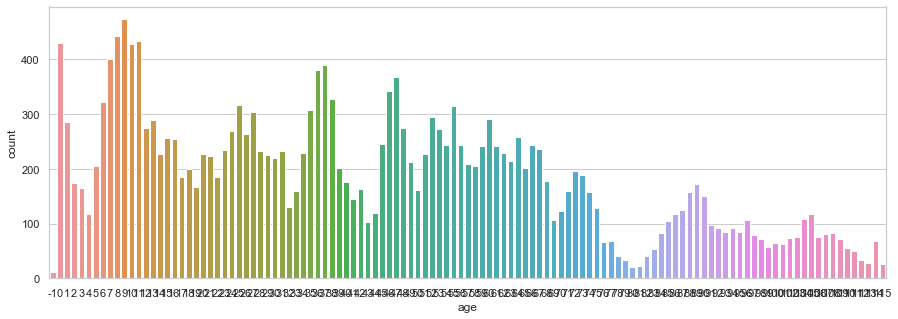

In [81]:
f, axe = plt.subplots(figsize=(15,5))
p1 = sns.countplot(df_dm['age'], ax=axe)

In [111]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)

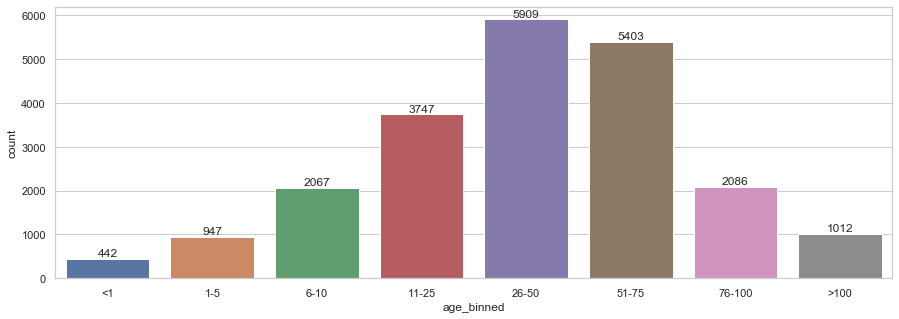

In [133]:
f, axes = plt.subplots(figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes)
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")

In [112]:
df_dm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_rnv_binned,age_binned
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,59,0.0,<1,51-75
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,63,23.0,11-25,51-75
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,82,0.0,<1,76-100
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,49,0.0,<1,26-50
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,28,0.0,<1,26-50


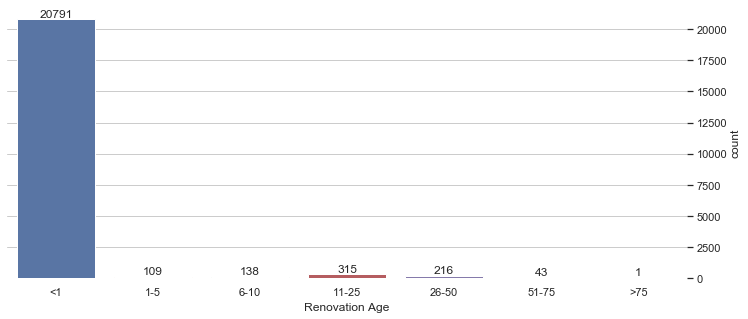

In [84]:
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

f, axe = plt.subplots(figsize=(12.18,5))
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axe)
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axe.yaxis.set_label_position("right")
axe.yaxis.tick_right()
axe.set(xlabel='Renovation Age');

In [134]:
# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

In [135]:
df_dm.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sales_yr', 'age',
       'age_rnv', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75'],
      dtype='object')

# 4) Multiple Regression

### 4-1) 앞 EDA로 본 6개 변수만 추가 시

In [145]:
train_data_dm, test_data_dm = train_test_split(df_dm, train_size=0.8,
                                              random_state=3)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features], train_data_dm['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

Intercept: -57221293.13485892
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]


In [147]:
pred = complex_model_1.predict(test_data_dm[features])

In [148]:
# RMSE
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
# R-squared
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
# adjusted R-squared
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
# R-squared for test set
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
# adjusted R-squared for test set
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
# cross_validation 
cv = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

In [149]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1',
                    'Selected features',
                    rmsecm,
                    rtrcm,
                    artrcm,
                    rtecm,
                    artecm,
                    cv]
evaluation.sort_values(by='5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


## 4-2) 변수 더 추가시

In [150]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']

In [151]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features], train_data_dm['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

Intercept: 14932064.45670693
Coefficients: [-3.74523328e+04  4.83495326e+04  1.71684976e+02 -2.31081061e-01
  1.03590806e+04  5.56285921e+05  4.78399848e+04  1.24143045e+05
 -8.88123227e+04 -1.05756567e+05 -1.04723750e+05 -1.35898725e+05
 -5.37336956e+04  8.41048129e+04  1.84153081e+05  2.20667166e+05
 -1.60046391e+02]


In [153]:
pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


## 4-3) 모든 변수 추가시

In [157]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data[features],train_data['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df[features],df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','all features, no preprocessing',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 7580919.940385457
Coefficients: [-3.51323305e+04  4.25821114e+04  1.10705020e+02  1.13581822e-01
  6.82992716e+03  5.61794985e+05  5.28174040e+04  2.48918356e+04
  9.57708783e+04  7.01998424e+01  4.05051775e+01 -2.70948034e+03
  2.26715091e+01 -5.80427853e+02  5.98629230e+05 -2.08875497e+05
  2.32857416e+01 -3.75353459e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


## 4-4) Feature Engineer 이후 생성된 모든 변수 추가시

In [159]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_4 = linear_model.LinearRegression()
complex_model_4.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_4.intercept_))
print('Coefficients: {}'.format(complex_model_4.coef_))

pred = complex_model_4.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_4.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_4.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_4.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_4.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_4,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 8748434.764240816
Coefficients: [-3.33491904e+04  3.76549641e+04  1.10716147e+02  1.22826592e-01
 -1.26725956e+04  5.69817402e+05  5.41386091e+04  3.17275550e+04
  9.52300581e+04  7.05367207e+01  4.01795621e+01 -4.46861874e+04
 -5.43838963e+04 -7.11287025e+04 -8.93583274e+04 -5.92594439e+04
  3.70943651e+04  1.22837694e+05  1.58884499e+05 -1.97812401e+04
  9.43034022e+04  8.74164248e+04  4.14131931e+04 -1.50309593e+04
 -1.06990366e+05 -8.13304552e+04 -6.50061210e+02  6.03335811e+05
 -2.10031732e+05  2.42386074e+01 -3.08651553e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-4,all features,191879.550,0.701,0.700,0.713,0.711,0.698
2,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


### Regularization
feature가 너무 많아서 발생하는 overfitting을 막기 위해서.

#### Ridge regression -> L2 regularization
Many small/medium sized effects: use ridge  
알파값을 올릴수록, regularization 증가.
#### Lasso regression -> L1 regularization
Only a few variables with medium/large effect: use lasso.

## Ridge

### alpha = 1

In [165]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [168]:
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features], train_data_dm['price'])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [169]:
pred1 = complex_model_R.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

### alpha = 100

In [172]:
complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features], train_data_dm['price'])

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [173]:
pred2 = complex_model_R.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

## 다른 방법으로 구현

In [201]:
from sklearn.linear_model import Ridge
complex_model_R = Ridge(alpha=1, normalize=True)
complex_model_R.fit(train_data_dm[features], train_data_dm['price'])
pred = complex_model_R.predict(test_data_dm[features])

In [202]:
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

In [203]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression_brunch','alpha=1, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-4,all features,191879.550,0.701,0.700,0.713,0.711,0.698
4,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.700,0.713,0.711,0.698
6,Lasso Regression,"alpha=1, all features",191880.918,0.701,0.700,0.713,0.711,0.698
7,Lasso Regression,"alpha=100, all features",192060.144,0.701,0.700,0.713,0.711,0.698
2,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
5,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
8,Ridge Regression_brunch,"alpha=1, all features",212402.361,0.633,0.633,0.649,0.646,0.633
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


In [199]:
# evaluation = evaluation[evaluation['Model'] != 'Ridge Regression_brunch']

### put it into evaluation table

In [175]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]

In [176]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-4,all features,191879.550,0.701,0.700,0.713,0.711,0.698
4,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.700,0.713,0.711,0.698
2,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
5,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


## Lasso regression

In [178]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [180]:
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features], train_data_dm['price'])

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [181]:
pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

### alpha = 100

In [183]:
complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

In [184]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]

In [185]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-4,all features,191879.550,0.701,0.700,0.713,0.711,0.698
4,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.700,0.713,0.711,0.698
6,Lasso Regression,"alpha=1, all features",191880.918,0.701,0.700,0.713,0.711,0.698
7,Lasso Regression,"alpha=100, all features",192060.144,0.701,0.700,0.713,0.711,0.698
2,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
5,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


### Lasso code from brunch

In [197]:
# lassoReg = Lasso(alpha=1, noramlize=True)
# lassoReg.fit(x_train, y_train)
# pred = lassoReg.predict(x_test)

## Elastic Net

In [189]:
from sklearn.linear_model import ElasticNet

In [210]:
complex_model_E = linear_model.ElasticNet(alpha=1, l1_ratio=0.5)
complex_model_E.fit(train_data_dm[features], train_data_dm['price'])

pred4 = complex_model_E.predict(test_data_dm[features])

rmsecm4 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred4)),'.3f'))
rtrcm4 = float(format(complex_model_E.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm4 = float(format(adjustedR2(complex_model_E.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm4 = float(format(complex_model_E.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm4 = float(format(adjustedR2(complex_model_E.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv4 = float(format(cross_val_score(complex_model_E,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

In [211]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Elastic_net Regression','alpha=1, l1_ratio=0.5, all features',rmsecm4,rtrcm4,artrcm4,rtecm4,artecm4,cv4]

In [212]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-4,all features,191879.550,0.701,0.700,0.713,0.711,0.698
4,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.700,0.713,0.711,0.698
6,Lasso Regression,"alpha=1, all features",191880.918,0.701,0.700,0.713,0.711,0.698
7,Lasso Regression,"alpha=100, all features",192060.144,0.701,0.700,0.713,0.711,0.698
2,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
5,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
8,Ridge Regression_brunch,"alpha=1, all features",212402.361,0.633,0.633,0.649,0.646,0.633
9,Elastic_net Regression,"alpha=1, l1_ratio=0.5, all features",227640.030,0.591,0.590,0.596,0.593,0.588
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


In [209]:
evaluation = evaluation[evaluation['Model'] != 'Elastic_net Regression']

elastic의 정확도가 높음에도 5fold가 낮은 이유: 모델에 overfitting이 존재

## Polynomial Regression

#### 데이터가 quadratic distribution인 경우

In [217]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

In [218]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront','view','grade','yr_built','zipcode']

In [220]:
polyfeat = PolynomialFeatures(degree=2)
x_allpoly = polyfeat.fit_transform(df[features])
x_trainpoly = polyfeat.fit_transform(train_data[features])
x_testpoly = polyfeat.fit_transform(test_data[features])

In [221]:
poly = linear_model.LinearRegression().fit(x_trainpoly,
                                          train_data['price'])

In [226]:
pred1 = poly.predict(x_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(x_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(x_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),x_allpoly,df['price'],cv=5).mean(),'.3f'))

In [227]:
polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

In [228]:
r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]

In [230]:
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, selected features, no preprocessing",190984.189,0.730,0.716,0.714
1,Polynomial Regression,"degree=3, selected features, no preprocessing",189235.268,0.749,0.721,0.595


## KNN regression

In [232]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [233]:
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data_dm[features], train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

In [235]:
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

In [236]:
rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn1 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn1 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn1 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

In [237]:
r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','k=15, all features',rmseknn1,rtrknn1,artrknn1,rteknn1,arteknn1,cv1]

In [238]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-4,all features,191879.550,0.701,0.700,0.713,0.711,0.698
4,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.700,0.713,0.711,0.698
6,Lasso Regression,"alpha=1, all features",191880.918,0.701,0.700,0.713,0.711,0.698
7,Lasso Regression,"alpha=100, all features",192060.144,0.701,0.700,0.713,0.711,0.698
2,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
5,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
1,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
8,Ridge Regression_brunch,"alpha=1, all features",212402.361,0.633,0.633,0.649,0.646,0.633
9,Elastic_net Regression,"alpha=1, l1_ratio=0.5, all features",227640.030,0.591,0.590,0.596,0.593,0.588
0,Multiple Regression-1,Selected features,248514.011,0.514,0.514,0.519,0.518,0.512


# Evaluation Table

In [240]:
evaluation_temp = evaluation.append(evaluation_poly)
evaluation_temp1 = evaluation_temp.sort_values(by='5-Fold Cross Validation',
                                              ascending=False)
evaluation_temp2 = evaluation_temp1.reset_index()
evaluation_f = evaluation_temp2.iloc[:, 1:]
evaluation_f

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, selected features, no preprocessing",190984.189,0.730,-,0.716,-,0.714
1,Multiple Regression-4,all features,191879.550,0.701,0.7,0.713,0.711,0.698
2,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.7,0.713,0.711,0.698
3,Lasso Regression,"alpha=1, all features",191880.918,0.701,0.7,0.713,0.711,0.698
4,Lasso Regression,"alpha=100, all features",192060.144,0.701,0.7,0.713,0.711,0.698
5,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
6,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
7,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
8,Ridge Regression_brunch,"alpha=1, all features",212402.361,0.633,0.633,0.649,0.646,0.633
9,Polynomial Regression,"degree=3, selected features, no preprocessing",189235.268,0.749,-,0.721,-,0.595
